## 1. Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing Data

In [5]:
# Creating a reusable path to my data

path = r'C:\Users\vaiva\OneDrive\Documents\CareerFoundry\Achievement 4 07-2023 Instacart Basket Analysis'

In [6]:
# Importing orders_products_all.pkl

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [7]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,user_id,order_id,order_number,order_day_of_week,order_hour_of_day,...,name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.800781,138,3139998,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.800781,138,1977647,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.000000,138,3160996,1,5,13,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.000000,138,2254091,10,5,14,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,Apricots,18,10,12.898438,138,505689,9,6,12,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


In [8]:
# Create a subset of the dataframe, because my laptop doesn't hve enough memory

df_sub = df[0:1000000]

In [9]:
df_sub.describe()

,product_id,aisle_id,department_id,prices,user_id,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,average_spend,days_since_prior_order_median,age,n_dependants,income
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.00000,1000000.000000,1000000.000000,957474.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,25270.667919,64.758945,10.160525,NaN,97518.470951,1.706754e+06,21.64284,2.765877,13.150937,NaN,9.384497,0.636225,41.923076,7.659544,8.677023,49.583092,1.524299,96851.509807
std,14257.669080,47.793873,6.361510,0.000000,60519.508785,9.855452e+05,19.50913,2.027947,4.204159,0.0,8.104761,0.481085,26.133849,0.709819,5.776468,18.787222,1.122237,44523.722614
min,1.000000,-128.000000,1.000000,1.000000,2.000000,1.500000e+01,1.00000,0.000000,0.000000,0.0,1.000000,0.000000,3.000000,3.121429,0.000000,18.000000,0.000000,25972.000000
25%,13176.000000,26.000000,4.000000,4.101562,43360.000000,8.562070e+05,7.00000,1.000000,10.000000,4.0,3.000000,0.000000,21.000000,7.286159,5.000000,33.000000,1.000000,64340.000000
50%,24964.000000,78.000000,9.000000,7.199219,93238.000000,1.704851e+06,16.00000,3.000000,13.000000,7.0,7.000000,1.000000,37.000000,7.710612,7.000000,50.000000,2.000000,95133.000000
75%,37718.000000,104.000000,16.000000,11.101562,150074.000000,2.559740e+06,31.00000,5.000000,16.000000,12.0,13.000000,1.000000,58.000000,8.090476,10.000000,66.000000,3.000000,124674.000000
max,49688.000000,127.000000,21.000000,25.000000,206178.000000,3.421065e+06,99.00000,6.000000,23.000000,30.0,100.000000,1.000000,99.000000,11.857143,30.000000,81.000000,3.000000,576876.000000


## 3. TASK

## Step 2

### Bar Chart

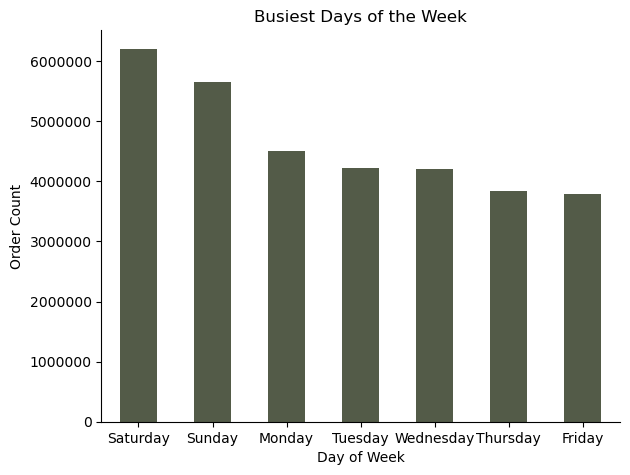

In [10]:
# Plotting a bar chart for order_day_of_week column

bar_dow = df['order_day_of_week'].value_counts().plot.bar(title = 'Busiest Days of the Week', color='#535B48')

# Define a dictionary to map numerical day values to day names
day_names = {
    0: 'Saturday',
    
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

plt.xlabel('Day of Week')
plt.ylabel('Order Count')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

# Use the 'day_names' dictionary to set the tick labels for the x-axis
plt.xticks(list(day_names.keys()), list(day_names.values()), rotation=0)
plt.show()

In [11]:
# Exporting the bar chart as an image

bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Histogram

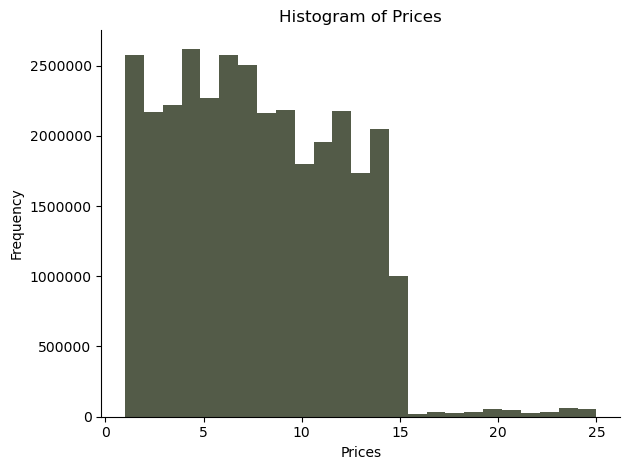

In [12]:
# Create a histogram for prices column

df['prices'].plot.hist(bins = 25, color='#535B48',  title = 'Histogram of Prices')

plt.xlabel('Prices')
plt.ylabel('Frequency')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

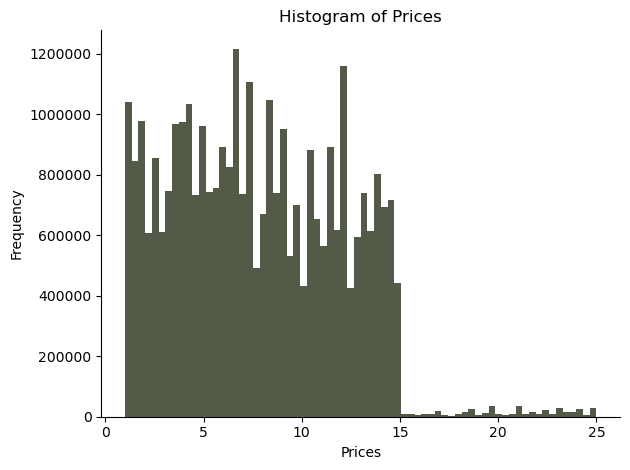

In [13]:
# Creating a more granular histogram

hist = df['prices'].plot.hist(bins = 70, color='#535B48', title = 'Histogram of Prices')

plt.xlabel('Prices')
plt.ylabel('Frequency')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [14]:
# Exporting the histogram as an image

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_prices.png'))

### Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

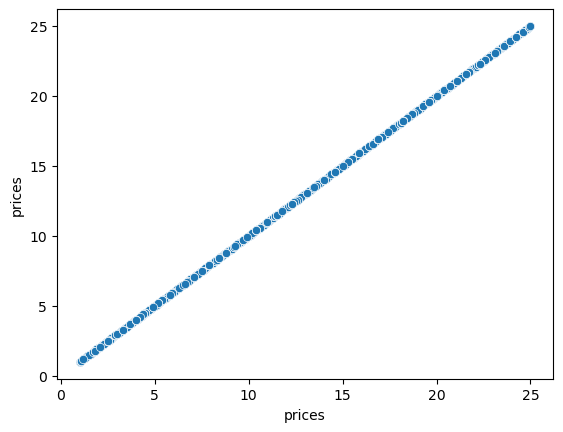

In [15]:
# If I left the prices 99999 and 14900 and had a strange historgram, I would create a scatterplot for prices against itself to check for outliers

sns.scatterplot(x = 'prices', y = 'prices',data = df_sub)

### Line Chart

In [16]:
# Creating a sample list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(df_sub)) <= 0.7

In [17]:
# We get an array with boolean values

dev

array([False,  True, False, ..., False,  True, False])

In [18]:
# Store 70% of the sample in the df big 

big = df_sub[dev]

In [19]:
# Store 30% of the sample in df small. The tilde '~' means that it's the opposite of the variable

small = df_sub[~dev]

In [20]:
# Checking if the split was successful by comparing rows of df with the sum of rows from split df's

len(df_sub)

1000000

In [21]:
len(big) + len(small)

1000000

In [22]:
# Reducing the number of columns to only the ones that I need

df_2 = small[['order_day_of_week','prices']]

In [23]:
df_2.head()

,order_day_of_week,prices
0,6,5.800781
2,5,20.000000
3,5,20.000000
6,5,4.398438
10,0,12.796875


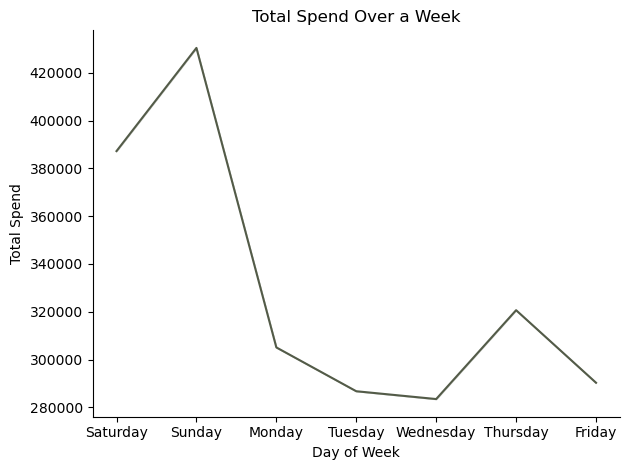

In [24]:
# Creating a line chart with the sample df 'small' and save it to an object 'line'

line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices', estimator = sum, color='#535B48', errorbar=('ci', 3))

# Define a dictionary to map numerical day values to day names
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

plt.title('Total Spend Over a Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Spend')

# Use the 'day_names' dictionary to set the tick labels for the x-axis
plt.xticks(list(day_names.keys()), list(day_names.values()), rotation=0)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [25]:
# Exporting the line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_prices.png'))

## Step 3

Create a histogram of the “order_hour_of_day” column.

In [26]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'user_id', 'order_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'ind', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spending_flag', 'days_since_prior_order_median', 'frequency_flag',
       'name', 'surname', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

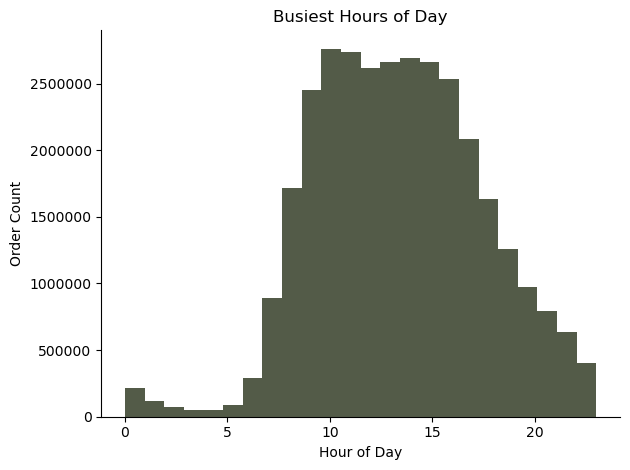

In [27]:
# Create a histogram for order_hour_of_day column and saving it into a variable

hist_hour = df['order_hour_of_day'].plot.hist(bins = 24, color='#535B48', title = 'Busiest Hours of Day')

plt.xlabel('Hour of Day')
plt.ylabel('Order Count')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

### Comment
From the histogram above we can see that the most popular time of day to make orders is between 9 am till 16 pm, with 9am being the peak order time and the least popular time of the day is during the night from midnight till 6 am in the morning.

In [28]:
# Exporting the histogram as an image

hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hours.png'))

## Step 4
Create a bar chart from the “loyalty_flag” column.

In [29]:
df['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

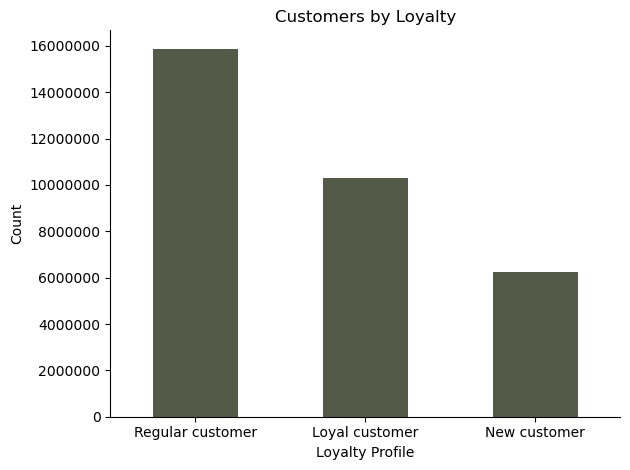

In [30]:
# Creating a bar chart from 'loyalty_flag' column and saving it into a variable

bar_loy = df['loyalty_flag'].value_counts().plot.bar(color =['#535B48'], title = 'Customers by Loyalty')

plt.xlabel('Loyalty Profile')
plt.ylabel('Count')

# Customize the Y-axis labels to display full integers
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [31]:
# Exporting the bar chart as an image

bar_loy.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

## Step 5
Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [32]:
# Creating a new df from the sample 'small' and for the columns prices and order_hour_of_day

df_3 = small[['order_hour_of_day','prices']]

In [33]:
df_3

,order_hour_of_day,prices
0,11,5.800781
2,13,20.000000
3,14,20.000000
6,13,4.398438
10,9,12.796875
...,...,...
999987,18,4.000000
999990,13,4.000000
999996,18,12.296875
999997,19,12.296875


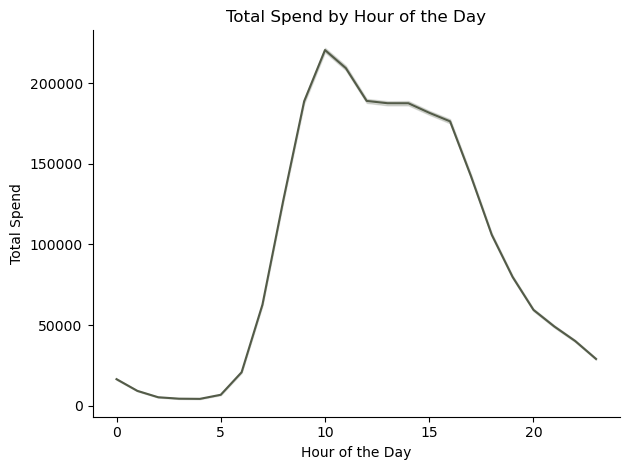

In [34]:
line_price_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices', color='#535B48', estimator = sum)

plt.title('Total Spend by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Spend')

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

The line chart indicates that the expenditure can increase during the least popular hours of the day and decrease during the busier hours from the morning till the afternoon. However, logically we should see more money spent during the busiest hours of the day.

In [35]:
# Exporting line chart

line_price_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour.png'))

## Step 6
Create a line chart exploring the connections between age and number of dependents

In [36]:
# Creating a new df from the sample 'small' and for the columns age and on_dependants

df_4 = small[['age','n_dependants']]

In [37]:
df_4

,age,n_dependants
0,81,1
2,81,1
3,81,1
6,81,1
10,81,1
...,...,...
999987,67,3
999990,67,3
999996,67,3
999997,67,3


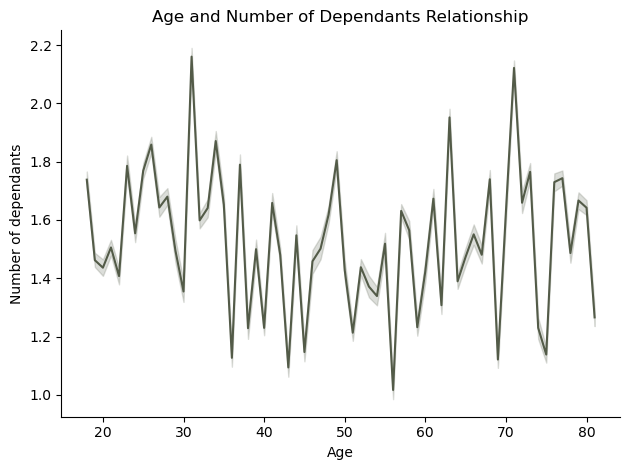

In [38]:
line_age_dep = sns.lineplot(data = df_4, x = 'age',y = 'n_dependants', color = '#535B48')

plt.title('Age and Number of Dependants Relationship')
plt.xlabel('Age')
plt.ylabel('Number of dependants')

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [39]:
# Saving the line chart

line_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dep.png'))

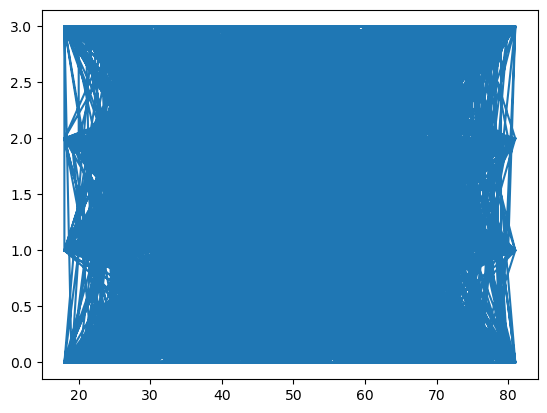

In [40]:
# Line chart with Matplotlib

line_age_dep_1 = plt.plot(df_4['age'], df_4['n_dependants'])

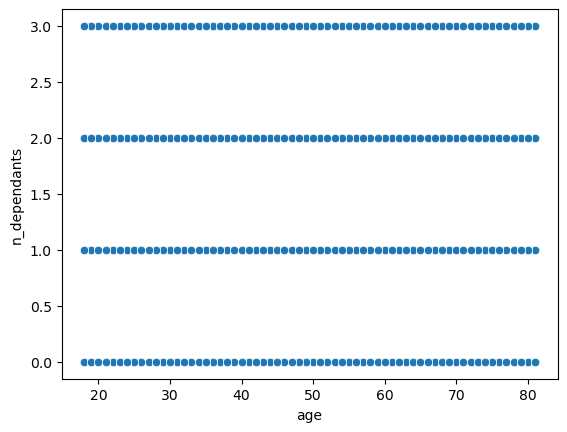

In [41]:
# Trying a scatterplot to see if there is a pattern

scatter_age_dep = sns.scatterplot(x = 'age', y = 'n_dependants', data = df_4)

In [42]:
# Saving the scatterplot

scatter_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_dep.png'))

### Comment

The charts above do not show any specific pattern that would connect a specific age to a specific family situation. 

## Step 7
Check if there's a connection between age and spending power (income)

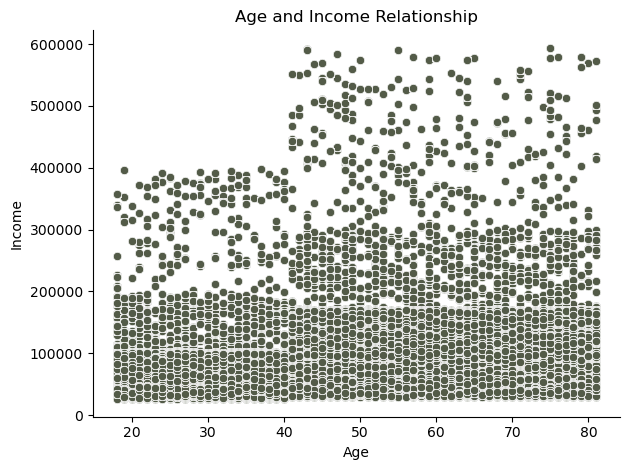

In [43]:
scatter = sns.scatterplot(x = 'age', y = 'income',data = df, color='#535B48')

# Add a title using Matplotlib's plt.title()
plt.title('Age and Income Relationship')

plt.xlabel('Age')
plt.ylabel('Income')

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

### Comment

While those who earn up to 20,000 a year are spread quite evenly age-wise, it seems that from age 40 onwards, people have higher diposable income compared to younger people. 

In [44]:
# Exporting the scatterplot as an image

scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))